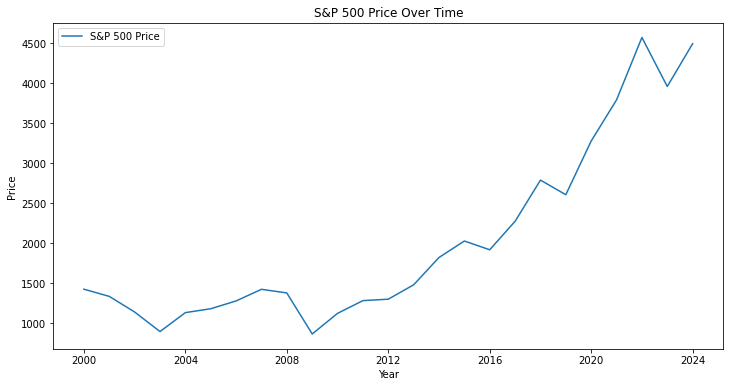

                               SARIMAX Results                                
Dep. Variable:          S&P 500 Price   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -174.641
Date:                Fri, 22 Sep 2023   AIC                            355.281
Time:                        23:02:26   BIC                            358.816
Sample:                    12-31-1999   HQIC                           356.219
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9522      0.565      1.686      0.092      -0.154       2.059
ma.L1         -0.8578      0.772     -1.112      0.266      -2.370       0.655
sigma2      1.209e+05   4.52e+04      2.671      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your dataset (assuming it's stored in a CSV file named "INPUT.csv")
data = pd.read_csv('INPUT.csv')

# Ensure 'End of Year' is in datetime format with the 'DD/MM/YYYY' format
data['End of Year'] = pd.to_datetime(data['End of Year'], format='%d/%m/%Y')

# Set 'End of Year' as the index (assuming it's your time column)
data.set_index('End of Year', inplace=True)

# Check for missing values and fill them if needed
data.fillna(method='ffill', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['S&P 500 Price'], label='S&P 500 Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('S&P 500 Price Over Time')
plt.legend()
plt.show()

# ARIMA model parameters (p, d, q)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the data stationary)
q = 1  # Moving Average (MA) order

# Fit the ARIMA model
model = ARIMA(data['S&P 500 Price'], order=(p, d, q))
results = model.fit()

# Summary of the ARIMA model
print(results.summary())

# Make predictions for future years
forecast_steps = 5  # Adjust this based on how many years you want to forecast
forecast = results.forecast(steps=forecast_steps)

# Print the forecasted values
print(forecast)
